C:\Users\KIIT0\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 40s 267ms/step - accuracy: 0.7244 - loss: 0.4894 - val_accuracy: 0.9800 - val_loss: 0.0685
Epoch 2/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 27s 264ms/step - accuracy: 0.9939 - loss: 0.0215 - val_accuracy: 0.9825 - val_loss: 0.0559
Epoch 3/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 26s 260ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9663 - val_loss: 0.1505
Epoch 4/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 27s 263ms/step - accuracy: 0.9936 - loss: 0.0168 - val_accuracy: 0.9813 - val_loss: 0.0829
Epoch 5/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 26s 254ms/step - accuracy: 0.9997 - loss: 0.0015 - val_accuracy: 0.9863 - val_loss: 0.0712
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9847 - loss: 0.0759
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step


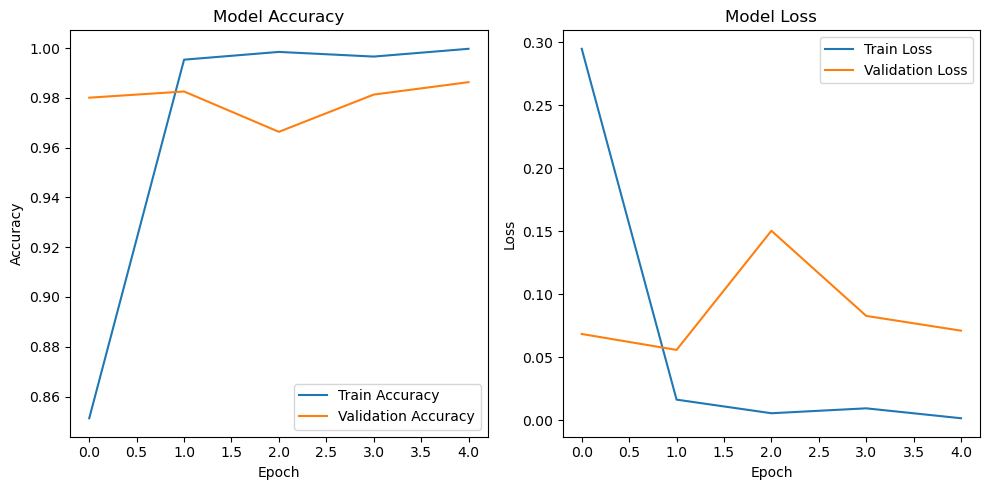

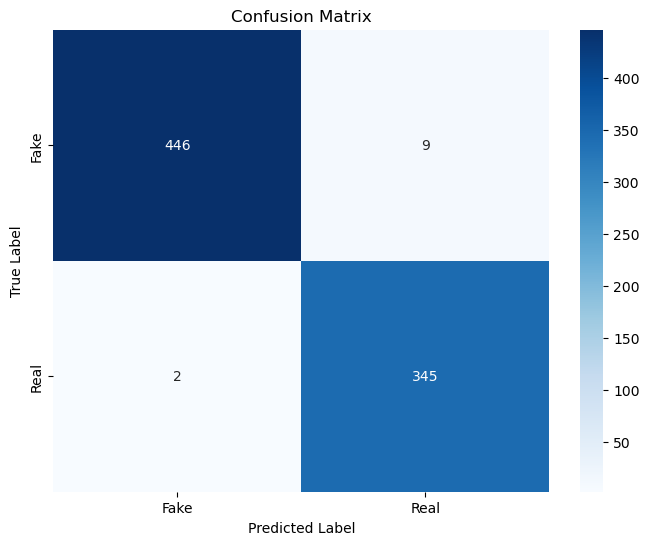

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       455
           1       0.97      0.99      0.98       347

    accuracy                           0.99       802
   macro avg       0.99      0.99      0.99       802
weighted avg       0.99      0.99      0.99       802

Accuracy Score: 0.986284289276808


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Bidirectional
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r"C:\Users\KIIT0\Downloads\data.csv")

# Preprocess the dataset (Assuming 'Headline', 'Body', and 'Label' columns exist)
# Preprocess the dataset (Assuming 'Headline', 'Body', and 'Label' columns exist)
# Convert 'Headline' and 'Body' columns to string type before concatenation
data['text'] = data['Headline'].astype(str) + ' ' + data['Body'].astype(str)
X = data['text'].values
y = data['Label'].values

# Encode labels (assuming binary classification: Fake = 0, Real = 1)
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text
max_words = 50000  # Maximum number of words to consider in the tokenizer
max_len = 300  # Maximum length of each text sequence

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Model building: CNN + RNN (LSTM)
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

# Convolutional Layer
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# LSTM Layer
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=5, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)

# Make predictions
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
classification_rep = classification_report(y_test, y_pred)

# Accuracy Score
acc_score = accuracy_score(y_test, y_pred)

# Visualization: Training & Validation Accuracy and Loss
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report and accuracy
print("Classification Report:\n", classification_rep)
print("Accuracy Score:", acc_score)


In [10]:
# prompt: give a user input news article for the above model whether it is true or fake

#@title Give a news article to check whether it is true or fake
news_article = "Fred Rogers served as a sniper during the Vietnam War and had a large number of confirmed kills. Fred Rogers wore his iconic sweaters to conceal the extensive tattoos on his arms that were acquired while serving in the military." #@param {type:"string"}

# Preprocess the input news article
news_article_seq = tokenizer.texts_to_sequences([news_article])
news_article_pad = pad_sequences(news_article_seq, maxlen=max_len, padding='post')

# Make prediction
prediction = (model.predict(news_article_pad) > 0.5).astype("int32")[0][0]

# Print the prediction
if prediction == 1:
  print("The news article is predicted to be REAL.")
else:
  print("The news article is predicted to be FAKE.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
The news article is predicted to be REAL.


In [6]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip in

In [8]:
from tensorflow.keras.utils import plot_model

# Save the model architecture as an image file
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.
